<a href="https://colab.research.google.com/github/GowriShankarG/MTech_AIML/blob/master/ML_Assignment_Work_in_Progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

A heart attack, medically known as a myocardial infarction, occurs when blood flow to the heart is severely reduced or blocked, typically due to a buildup of fat, cholesterol, and other substances forming a plaque in the coronary arteries. This blockage can lead to the formation of a blood clot, which disrupts the oxygen supply to the heart muscle, potentially causing damage or death to the affected heart tissue.

This analysis leverages data-driven approaches to identify patterns and correlations that contribute to heart attack risks. By applying machine learning algorithms, healthcare providers can estimate the probability of a heart attack for a specific individual and provide personalized recommendations for preventive measures.

The goal is to enable early detection and proactive management of heart disease, ultimately reducing the prevalence of heart attacks and improving patient outcomes. This problem is crucial for advancing preventive cardiology and empowering individuals to take control of their cardiovascular health.

### Import Libraries/Dataset

a. Download the dataset.
b. Import the required libraries

In [1]:
# b. import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
# read the file
HAA_data=pd.read_csv("Heart_Attack_Analysis_Data.csv")
HAA_data.head(2)

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngia,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1


### Data Visualization and Exploration [1M]

a.     Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

b.     Print the description and shape of the dataset.

c.     Provide appropriate visualization to get an insight about the dataset.

In [7]:
# a. Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

HAA_data.head(5)



,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngia,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,1,1
4,57,0,0,120,354,0,1,163,1,0,1


In [10]:
# b. Print the description and shape of the dataset.
HAA_data.describe()


,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngia,FamilyHistory,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.204620,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.096825,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.000000,1.000000


In [11]:
# b. print shape of data set
HAA_data.shape

(303, 11)

In [12]:
# Provide appropriate visualization to get an insight about the dataset

HAA_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            303 non-null    int64
 1   Sex            303 non-null    int64
 2   CP_Type        303 non-null    int64
 3   BloodPressure  303 non-null    int64
 4   Cholestrol     303 non-null    int64
 5   BloodSugar     303 non-null    int64
 6   ECG            303 non-null    int64
 7   MaxHeartRate   303 non-null    int64
 8   ExerciseAngia  303 non-null    int64
 9   FamilyHistory  303 non-null    int64
 10  Target         303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


 Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer.

----------------
                    Age       Sex   CP_Type  BloodPressure  Cholestrol  \
Age            1.000000 -0.098447 -0.068653       0.279351    0.213678   
Sex           -0.098447  1.000000 -0.049353      -0.056769   -0.197912   
CP_Type       -0.068653 -0.049353  1.000000       0.047608   -0.076904   
BloodPressure  0.279351 -0.056769  0.047608       1.000000    0.123174   
Cholestrol     0.213678 -0.197912 -0.076904       0.123174    1.000000   
BloodSugar     0.121308  0.045032  0.094444       0.177531    0.013294   
ECG           -0.116211 -0.058196  0.044421      -0.114103   -0.151040   
MaxHeartRate  -0.398522 -0.044020  0.295762      -0.046698   -0.009940   
ExerciseAngia  0.096801  0.141664 -0.394280       0.067616    0.067023   
FamilyHistory  0.018045 -0.008787  0.032312      -0.034199   -0.041609   
Target        -0.225439 -0.280937  0.433798      -0.144931   -0.085239   

               BloodSugar       ECG  MaxHeartRate  ExerciseAngia  \
Age              0.121308 

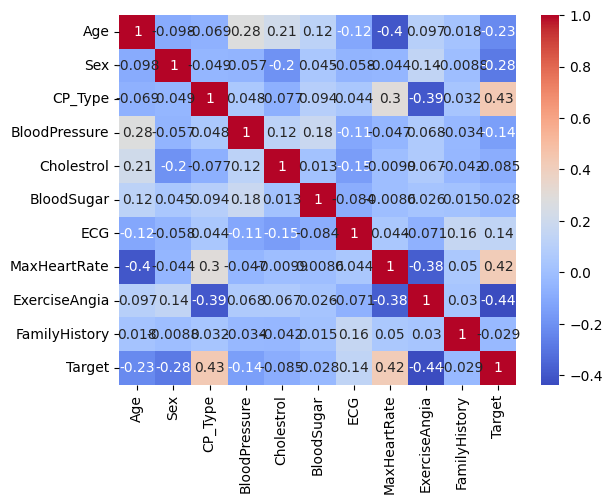

In [16]:
# Generate corrleated analysis of HAA_Data in visualization format
corr = HAA_data.corr()
print("----------------")
print(corr)
print("----------------")
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


### Data Pre-processing and cleaning [2M]

a.     Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell.

Apply appropriate feature engineering techniques. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations

depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks.

Explore a few techniques for identifying feature importance for your feature engineering task

### Model Building [5M]

a.     Split the dataset into training and test sets. Answer without justification will not be awarded marks. [1M]

i.     Train = 80 % Test = 20%

ii.     Also, try to split the dataset with different ratios of your choice.

b.     Build model using Logistic regression and decision tree  [4 M]

i.     Tune hyperparameters (e.g., number of trees, maximum depth) using cross-validation. Justify your answer.

Performance Evaluation [2M]

a.     Compare the performance of the Logistic Regression and Decision Tree models using appropriate evaluation metrics.

b.     Provide insights into which model performs better and why. Answer without justification will not be awarded marks.

Instructions for Assignment Evaluation
Organise your code in separate sections for each task. Add comments to make the code readable.
Deep Learning Models are strictly not allowed. You are encouraged to learn classical Machine learning techniques and experience their behaviour.
Notebooks without output shall not be considered for evaluation.